video link: https://www.youtube.com/watch?v=ATK6fm3cYfI&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=18

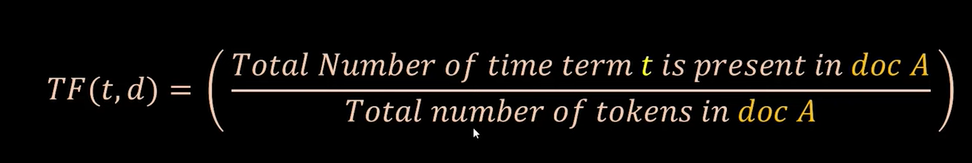

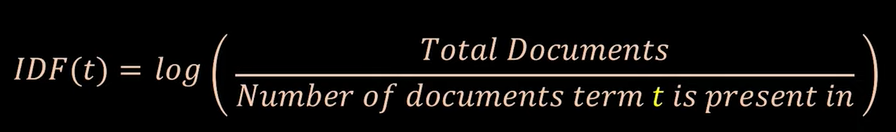

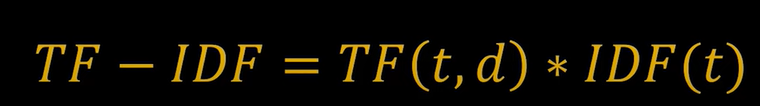

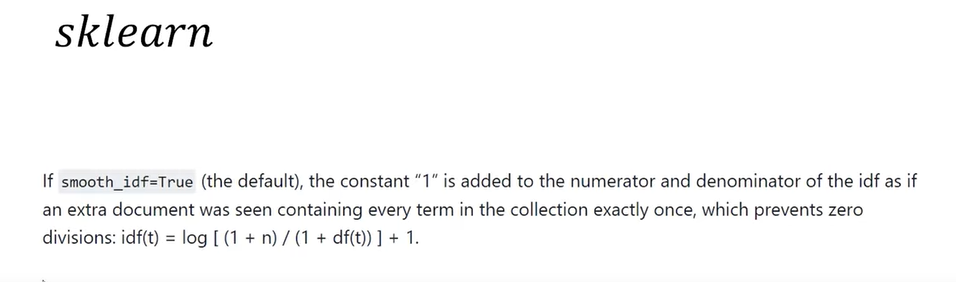

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [10]:
v = TfidfVectorizer()
transformed_output = v.fit_transform(corpus)
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [7]:
all_feature_names = v.get_feature_names_out() # print in sequnce of index

for word in all_feature_names:
    indx = v.vocabulary_.get(word)
    print(f"{word} {v.idf_[indx]}")

already 2.386294361119891
am 2.386294361119891
amazon 2.386294361119891
and 2.386294361119891
announcing 1.2876820724517808
apple 2.386294361119891
are 2.386294361119891
ate 2.386294361119891
biryani 2.386294361119891
dot 2.386294361119891
eating 1.9808292530117262
eco 2.386294361119891
google 2.386294361119891
grapes 2.386294361119891
iphone 2.386294361119891
ironman 2.386294361119891
is 1.1335313926245225
loki 2.386294361119891
microsoft 2.386294361119891
model 2.386294361119891
new 1.2876820724517808
pixel 2.386294361119891
pizza 2.386294361119891
surface 2.386294361119891
tesla 2.386294361119891
thor 2.386294361119891
tomorrow 1.2876820724517808
you 2.386294361119891


In [8]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [9]:
transformed_output.toarray()[:2] #tf-idf in outcome

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

### Case Study

In [11]:
import pandas as pd

df = pd.read_csv("ecommerce_data.csv")
print(df.shape)
df.head()

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [13]:
df.label.value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [16]:
df['label_num'] = df.label.map({
    'Household' : 0,
    'Books' : 1,
    'Electronics' : 2,
    'Clothing & Accessories' : 3
})

In [17]:
df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = df.label_num
)

In [23]:
print(X_train.shape)
print(X_test.shape)

(19200,)
(4800,)


In [24]:
y_train.value_counts()

label_num
0    4800
2    4800
3    4800
1    4800
Name: count, dtype: int64

In [25]:
y_test.value_counts()

label_num
0    1200
2    1200
3    1200
1    1200
Name: count, dtype: int64

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [27]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [29]:
X_test[:5]

20706    Lal Haveli Designer Handmade Patchwork Decorat...
19166    GOTOTOP Classical Retro Cotton & PU Leather Ne...
15209    FabSeasons Camouflage Polyester Multi Function...
2462     Indian Superfoods: Change the Way You Eat Revi...
6621     Milton Marvel Insulated Steel Casseroles, Juni...
Name: Text, dtype: object

In [32]:
X_test[:5][6621]

'Milton Marvel Insulated Steel Casseroles, Junior Gift Set, 3 Pieces, Pink Color Name:Pink    Multipurpose 3 Piece Casserole Set for Your Regular Use : Keep your freshly cooked food warmer for longer with the Milton casserole set of three. The other two casserole pieces of 1000 ml and 1500 ml, respectively can be used to store larger portions of food. This set is ideal for modern families. Manage time efficiently by preparing all the dishes in advance and having it steaming hot out of the casserole whenever you want.   Top Quality Insulation to keep Food Warm for Longer : These Milton casseroles are specially engineered so that the food you store inside is warmer and fresher for longer. The inner sides of the casseroles are made of quality steel while the outer body is made from high quality plastic, making the containers lightweight and efficient.   Easy to Maintain and Store Away : The simple streamlined designs of these casseroles make it easy for you to clean them. Available in an 

In [30]:
y_test[:5]

20706    0
19166    2
15209    3
2462     1
6621     3
Name: label_num, dtype: int64

In [31]:
y_pred[:5]

array([0, 2, 3, 1, 0], dtype=int64)

In [34]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [35]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.99      0.99      1200

    accuracy                           0.97      4800
   macro avg       0.98      0.97      0.97      4800
weighted avg       0.98      0.97      0.97      4800



### Using preprocessing

In [36]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [38]:
df_preprocessed = df 
df_preprocessed

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3
...,...,...,...
23995,Marvel Physics MCQ's for MHT - CET,Books,1
23996,Internet Download Manager | Lifetime License |...,Books,1
23997,Sadhubela's Handcrafted Iron Degchi Handi Pot ...,Household,0
23998,Audio-Technica AT-LP60 Automatic Belt Driven D...,Electronics,2


In [42]:
df_preprocessed["preprocessed text"] = df_preprocessed.Text.apply(preprocess)

In [43]:
df_preprocessed

,Text,label,label_num,preproceed text,preprocessed text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY PCI40010 PCI raid Host Controller ...,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer Women Art Mysore Silk Saree Bl...,Indira Designer Women Art Mysore Silk Saree Bl...
...,...,...,...,...,...
23995,Marvel Physics MCQ's for MHT - CET,Books,1,Marvel Physics MCQ MHT CET,Marvel Physics MCQ MHT CET
23996,Internet Download Manager | Lifetime License |...,Books,1,internet Download Manager | Lifetime License |...,internet Download Manager | Lifetime License |...
23997,Sadhubela's Handcrafted Iron Degchi Handi Pot ...,Household,0,Sadhubela Handcrafted Iron Degchi Handi Pot Dh...,Sadhubela Handcrafted Iron Degchi Handi Pot Dh...
23998,Audio-Technica AT-LP60 Automatic Belt Driven D...,Electronics,2,Audio Technica LP60 Automatic Belt Driven dj t...,Audio Technica LP60 Automatic Belt Driven dj t...


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    df_preprocessed['preprocessed text'],
    df_preprocessed.label_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = df_preprocessed.label_num
)

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.99      0.99      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800

